In [1]:
import pandas as pd

In [207]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [208]:
data_df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [4]:
len(data_df)

70000

In [5]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB
None


Correcting the data type

In [209]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
data_df.dtypes

date           datetime64[ns]
country                object
id                      int64
active                  int64
age                     int64
alco                    int64
ap_hi                   int64
ap_lo                   int64
cholesterol             int64
gender                  int64
gluc                    int64
height                  int64
occupation             object
smoke                   int64
weight                float64
disease                 int64
dtype: object

In [7]:
for column in data_df.columns:
    unique_values = data_df[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'date': <DatetimeArray>
['2021-05-03 00:00:00', '2021-08-05 00:00:00', '2022-11-13 00:00:00',
 '2018-10-31 00:00:00', '2020-09-25 00:00:00', '2021-12-21 00:00:00',
 '2021-01-08 00:00:00', '2022-08-19 00:00:00', '2020-11-09 00:00:00',
 '2022-04-28 00:00:00',
 ...
 '2019-02-16 00:00:00', '2021-12-12 00:00:00', '2019-10-01 00:00:00',
 '2022-05-25 00:00:00', '2020-10-25 00:00:00', '2021-12-25 00:00:00',
 '2018-01-13 00:00:00', '2020-01-23 00:00:00', '2018-02-09 00:00:00',
 '2021-11-07 00:00:00']
Length: 1827, dtype: datetime64[ns]
Unique values for column 'country': ['Indonesia' 'Malaysia' 'Singapore' 'India']
Unique values for column 'id': [    0     1     2 ... 99996 99998 99999]
Unique values for column 'active': [1 0]
Unique values for column 'age': [18393 20228 18857 ... 14925 17727 17926]
Unique values for column 'alco': [0 1]
Unique values for column 'ap_hi': [  110   140   130   150   100   120   145   170   135   125    90   180
   160   133   190    80   

In [210]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [230]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  




#further categoried the age group
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

populates_agebinned_columns(category_age, data_df)

,date,id,active,alco,ap_hi,ap_lo,height,smoke,weight,disease,...,occupation_num,Age_binned,age_binned,age_binned_<20s,age_binned_20s,age_binned_30s,age_binned_40s,age_binned_50s,age_binned_60s,age_binned_>60s
0,2021-05-03,0,1,0,110,80,168,0,62.0,0,...,0,50s,50s,0,0,0,0,1,0,0
1,2021-08-05,1,1,0,140,90,156,0,85.0,1,...,1,50s,50s,0,0,0,0,1,0,0
2,2022-11-13,2,0,0,130,70,165,0,64.0,1,...,2,50s,50s,0,0,0,0,1,0,0
3,2018-10-31,3,1,0,150,100,169,0,82.0,1,...,3,40s,40s,0,0,0,1,0,0,0
4,2020-09-25,4,0,0,100,60,156,0,56.0,0,...,0,40s,40s,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2018-04-03,99993,1,0,120,80,168,1,76.0,0,...,7,50s,50s,0,0,0,0,1,0,0
69996,2022-01-12,99995,1,0,140,90,158,0,126.0,1,...,1,60s,60s,0,0,0,0,0,1,0
69997,2022-08-25,99996,0,1,180,90,183,0,105.0,1,...,1,50s,50s,0,0,0,0,1,0,0
69998,2020-07-13,99998,0,0,135,80,163,0,72.0,1,...,1,60s,60s,0,0,0,0,0,1,0


In [231]:
#Further binning Blood Pressure
data_df.ap_hi.describe()

count    69996.000000
mean       128.817075
std        154.015805
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [235]:
def populate_bplevels_columns(df):
    if df[df.ap_hi < 120] and df[df.ap_lo < 80]:
        df['bp_normal'] = 1
    elif df[df.ap_hi < 129] and df[df.ap_lo < 80]:
        df['bp_elevated'] = 1
    elif df[df.ap_hi < 139] or df[df.ap_lo < 89]:
        data_df['bp_hypertension1'] = 1
    else:
        data_df['bp_hypertension2'] = 1
    
    return df


        

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


populate_bplevels_columns(data_df)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [211]:
data_df = data_df[data_df['bmi']< 200]

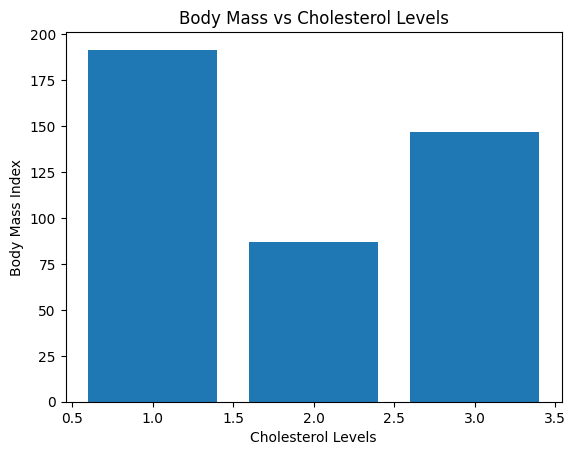

In [192]:
import matplotlib.pyplot as plt

cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

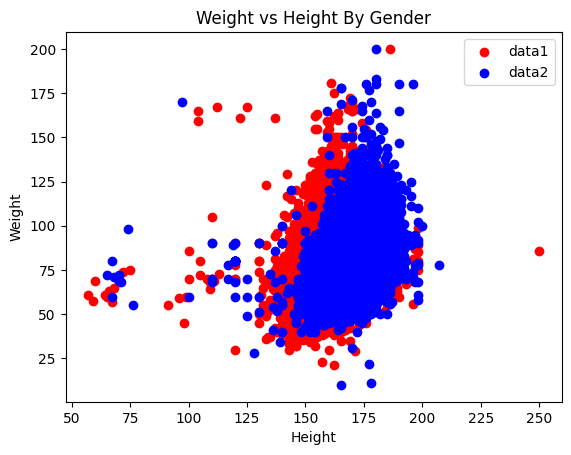

In [193]:
dataset1 = data_df[data_df['gender'] == 1]
dataset2 = data_df[data_df['gender'] == 2]

#Plotting
plt.scatter(dataset1['height'], dataset1['weight'], color='red', label='data1')
plt.scatter(dataset2['height'], dataset2['weight'], color='blue', label='data2')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Weight vs Height By Gender')

plt.legend()
plt.show()

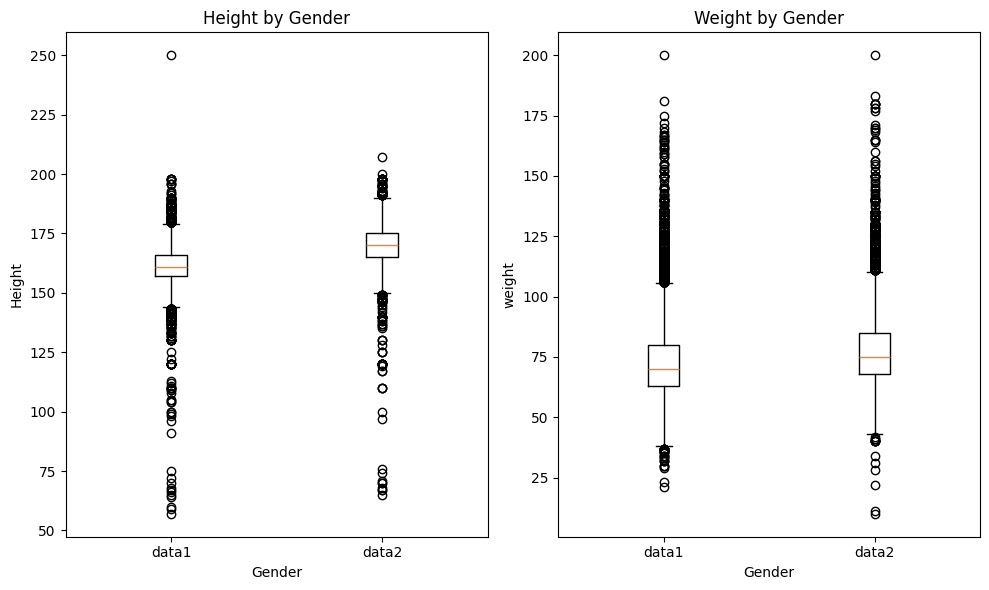

In [194]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [212]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop(columns=['gender'], inplace=True)


In [213]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop(columns=['cholesterol'], inplace=True)



In [214]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop(columns=['gluc'], inplace=True)


In [15]:
data_df.country.unique()

array(['Indonesia', 'Malaysia', 'Singapore', 'India'], dtype=object)

In [215]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

data_df[['country', 'country_num']].drop_duplicates()

,country,country_num
0,Indonesia,0
1,Malaysia,1
3,Singapore,2
8,India,3


In [216]:
data_df.drop(columns=['country'], inplace=True)

In [205]:
data_df.max()

date                  2023-01-01 00:00:00
id                                  99999
active                                  1
alco                                    1
ap_hi                               16020
ap_lo                               11000
height                                250
smoke                                   1
weight                              200.0
disease                                 1
age_years                              64
bmi                            191.666667
gender_male                             1
gender_female                           1
cholesterol_high                        1
cholesterol_medium                      1
cholesterol_low                         1
gluc_high                               0
gluc_medium                             0
gluc_low                                0
country_num                             3
occupation_num                          8
dtype: object

In [217]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

data_df[['occupation', 'occupation_num']].drop_duplicates()



,occupation,occupation_num
0,Architect,0
1,Accountant,1
2,Chef,2
3,Lawyer,3
5,Teacher,4
13,Nurse,5
15,Engineer,6
20,Doctor,7
22,Others,8


In [218]:
data_df.drop(columns=['occupation'], inplace=True)

In [219]:
#data_df['gluc'].unique()

data_df.corr()

,date,id,active,alco,ap_hi,ap_lo,height,smoke,weight,disease,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
date,1.000000,-0.001226,0.000686,0.008738,0.002552,0.002816,0.000010,0.003996,-0.001288,-0.002037,...,0.002007,-0.002007,-0.003219,0.004204,-0.000957,-0.008630,0.003226,0.004040,-0.003870,0.004386
id,-0.001226,1.000000,0.003774,0.001201,0.003356,-0.002531,-0.003471,-0.003656,-0.001642,0.003822,...,0.003475,-0.003475,0.005823,0.001260,-0.005281,0.001500,0.002360,-0.002843,0.001975,0.000911
active,0.000686,0.003774,1.000000,0.025483,-0.000034,0.004782,-0.006277,0.025844,-0.017023,-0.035669,...,0.005887,-0.005887,0.013070,-0.004684,-0.005912,-0.002416,-0.009925,0.009070,-0.001681,-0.001033
alco,0.008738,0.001201,0.025483,1.000000,0.001409,0.010601,0.094608,0.340128,0.067242,-0.007324,...,0.170959,-0.170959,0.016922,0.039397,-0.043611,-0.003491,0.031644,-0.020610,0.001960,-0.000061
ap_hi,0.002552,0.003356,-0.000034,0.001409,1.000000,0.016086,0.005521,-0.000919,0.030722,0.054477,...,0.006006,-0.006006,0.017045,0.015410,-0.024729,0.008182,0.009290,-0.012884,-0.002728,-0.003909
ap_lo,0.002816,-0.002531,0.004782,0.010601,0.016086,1.000000,0.006142,0.005190,0.043764,0.065722,...,0.015252,-0.015252,0.015151,0.019416,-0.026505,0.004793,0.013899,-0.013748,0.002730,-0.004970
height,0.000010,-0.003471,-0.006277,0.094608,0.005521,0.006142,1.000000,0.189037,0.295286,-0.010511,...,0.500380,-0.500380,-0.040964,-0.023518,0.048741,-0.013660,-0.012535,0.019328,-0.001287,0.001658
smoke,0.003996,-0.003656,0.025844,0.340128,-0.000919,0.005190,0.189037,1.000000,0.067607,-0.015529,...,0.338190,-0.338190,-0.002160,0.024602,-0.017870,-0.013050,0.016093,-0.002113,0.003906,0.000015
weight,-0.001288,-0.001642,-0.017023,0.067242,0.030722,0.043764,0.295286,0.067607,1.000000,0.181708,...,0.155758,-0.155758,0.114389,0.068114,-0.138037,0.068079,0.095234,-0.120353,0.000871,-0.003402
disease,-0.002037,0.003822,-0.035669,-0.007324,0.054477,0.065722,-0.010511,-0.015529,0.181708,1.000000,...,0.008131,-0.008131,0.191780,0.081456,-0.205532,0.070204,0.052851,-0.090855,-0.001011,-0.003499


Text(0.5, 1.0, 'Correlation Heatmap')

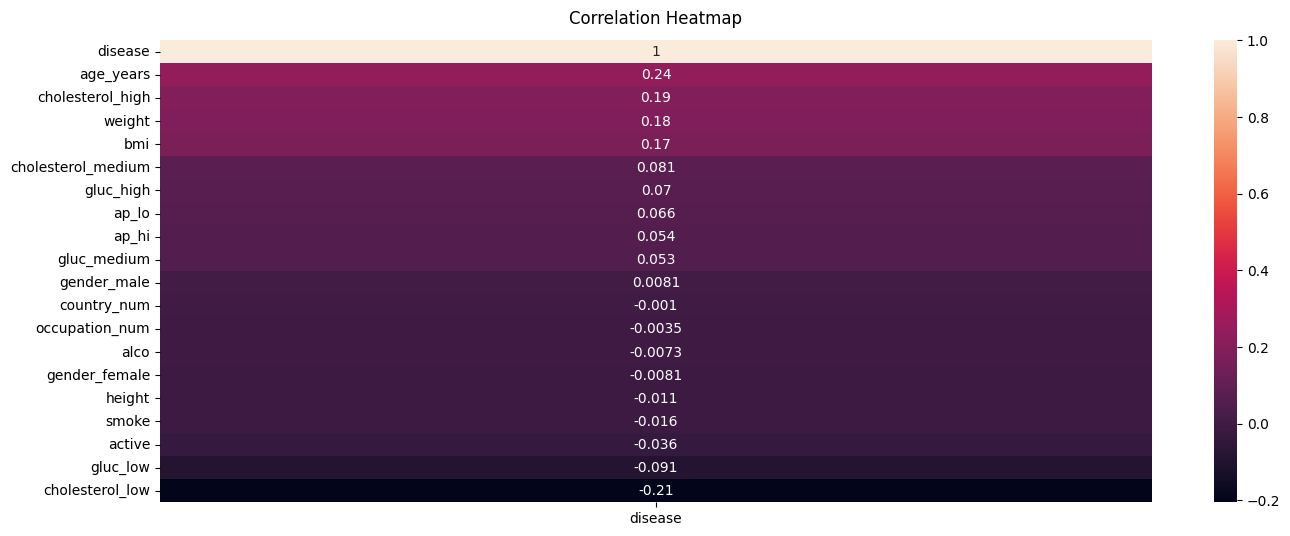

In [220]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [221]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [222]:
# Feature Selection

#X = iddate_removed_df.drop(columns=['disease'], axis = 1)
X = iddate_removed_df[['age_years','cholesterol_high','weight',
                       'cholesterol_medium','ap_lo','ap_hi',
                       'gender_male', 'gender_female',
                       ]]
y = iddate_removed_df['disease']

In [223]:
X.head(3)

,age_years,cholesterol_high,weight,cholesterol_medium,ap_lo,ap_hi,gender_male,gender_female
0,50,0,62.0,0,80,110,1,0
1,55,1,85.0,0,90,140,0,1
2,51,1,64.0,0,70,130,0,1


In [181]:
y.shape

(70000,)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [225]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

accuracy = metrics.accuracy_score(predictions, y_test)

print("The Accuracy of the logistic regression model is: ", accuracy*100, "%")

The Accuracy of the logistic regression model is:  71.79838847934168 %


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

acc = metrics.accuracy_score(pred, y_test)

print("The accuracy of the KNN model is: ", acc*100, "%")

The accuracy of the KNN model is:  67.29142857142857 %


In [33]:
#iddate_removed_df
#sns.pairplot(iddate_removed_df, hue = 'disease')

iddate_removed_df.unstack().sort_values(ascending = False).drop_duplicates()

active            active                1.000000
bmi               weight                0.762009
gender_male       height                0.499033
gluc_high         cholesterol_high      0.482027
gluc_low          cholesterol_low       0.383252
                                          ...   
cholesterol_high  cholesterol_low      -0.622339
gluc_low          gluc_medium          -0.672846
gluc_high         gluc_low             -0.682668
cholesterol_low   cholesterol_medium   -0.685393
gender_female     gender_male          -1.000000
Length: 191, dtype: float64

In [23]:
data_df

,date,id,active,alco,ap_hi,ap_lo,height,smoke,weight,disease,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
0,2021-05-03,0,1,0,110,80,168,0,62.0,0,...,1,0,0,0,1,0,0,1,0,0
1,2021-08-05,1,1,0,140,90,156,0,85.0,1,...,0,1,1,0,0,0,0,1,1,1
2,2022-11-13,2,0,0,130,70,165,0,64.0,1,...,0,1,1,0,0,0,0,1,0,2
3,2018-10-31,3,1,0,150,100,169,0,82.0,1,...,1,0,0,0,1,0,0,1,2,3
4,2020-09-25,4,0,0,100,60,156,0,56.0,0,...,0,1,0,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2018-04-03,99993,1,0,120,80,168,1,76.0,0,...,1,0,0,0,1,0,0,1,2,7
69996,2022-01-12,99995,1,0,140,90,158,0,126.0,1,...,0,1,0,1,0,0,1,0,1,1
69997,2022-08-25,99996,0,1,180,90,183,0,105.0,1,...,1,0,1,0,0,0,0,1,1,1
69998,2020-07-13,99998,0,0,135,80,163,0,72.0,1,...,0,1,0,0,1,0,1,0,2,1


In [24]:
#data_df[data_df['bmi'] > 200]